In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def closed_form_solution(X, y):
    w = np.linalg.pinv(X.T @ X) @ X.T @ y
    return w

In [4]:
# Generate synthetic data with two features
np.random.seed(42)  # For reproducibility
n = 100  # Number of data points

x1 = 2 * np.random.rand(n)
x2 = 3 * np.random.rand(n)
y = 5 + 1 * x1 + 2 * x2 + np.random.randn(n)

In [5]:
# Add a column of ones to X for the intercept term
X = np.c_[np.ones((n, 1)), x1, x2]

# Compute the optimal coefficients 
w = closed_form_solution(X, y)
print('Optimal coefficients:', w)

Optimal coefficients: [4.91061004 0.82913734 2.23977047]


Plotting the regression surface

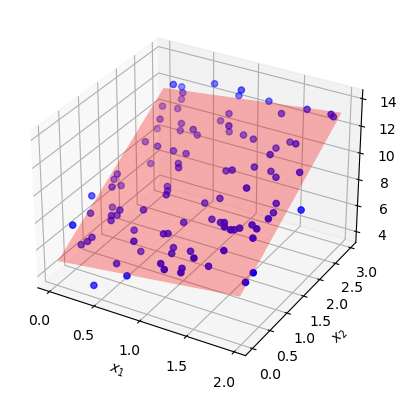

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Set up the figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x1, x2, y, color='blue')  

# Create a mesh grid for the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 20), 
                               np.linspace(x2.min(), x2.max(), 20))

# Calculate corresponding y values for the mesh grid
y_surf = w[0] + w[1] * x1_surf + w[2] * x2_surf

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='red', alpha=0.3)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

plt.savefig('figures/multiple_linear_regression.pdf')

Using the LinearRegression class

In [7]:
from sklearn.linear_model import LinearRegression

X = np.c_[x1, x2]  # Concatenating the two features

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 4.910610036450073
Coefficients: [0.82913734 2.23977047]
